<a href="https://colab.research.google.com/github/Hevej/Machine-Learning/blob/main/Manual_NN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
#Funciones
def sigmoid(a, derivate=False):
  if derivate:
    return np.exp(-a)/((np.exp(-a)+1)**2)
  else:
    return 1/(1+np.exp(-a))
def ReLU(a, derivate=False):
  if derivate:
    a[a<=0] = 0
    a[a>0] = 1
    return a
  else:
    return np.maximum(0,a)

In [ ]:
#Ejemplos
N = 1000
#Crear circulos gausianos
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        #Cantidad de valores x
                        n_features=2,
                        #Cantidad de clases
                        n_classes=2,
                        shuffle=True,
                        random_state=None)

In [ ]:
#X contiene el grupo de valores [x0,x1]
#Y contiene la etiqueta de clase 0 o 1
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]

In [ ]:
X.shape

(1000, 2)

In [ ]:
Y.shape

(1000, 1)

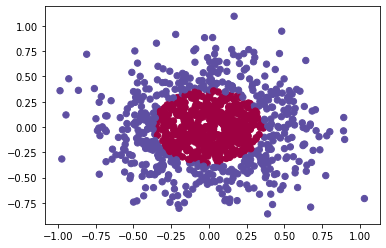

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:], s=40, cmap=plt.cm.Spectral)

In [ ]:
#Funcion de perdida
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat-y)
  else:
    return np.mean((y_hat - y)**2)

In [ ]:
def initializer(layers_dim):
  parameters = {}
  L = len(layer_dims)         
  for l in range(0, L-1):
      parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
      parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
  return parameters

In [ ]:
def train(xData, lr, params, training = True):
  #X sera la activación de entrada
  params['A0'] = xData
  #Forward
  params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1'] = ReLU(params['Z1'])

  params['Z2'] = np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2'] = ReLU(params['Z2'])

  params['Z3'] = np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
    #Backpropagation
    #dC/db^L = dC/da^L * da^L/dZ^L * 1 = dC/dZ = δ^L para la ultima capa
    #δ^L
    params['db3'] =  mse(Y,output,True)*sigmoid(params['A3'],True)
    #dC/dW^L = dC/dZ * a^(L-1) = δ^L *  a^(L-1) para la ultima capa
    #δ^L *  a^(L-1)
    params['dW3'] = np.matmul(params['A2'].T,params['db3'])

    #Capas ocultas
    #dC/db^(L-1) = δ^L * dZ^L/da^(L-1) * da^(L-1)/dZ^(L-1) =  δ^(L-1) 
    #dC/db^(L-1) = δ^L * W^L* σ'(Z^L) =  δ^(L-1)
    #δ^(L-1) 
    params['db2'] = np.matmul(params['db3'],params['W3'].T)*ReLU(params['A2'],True)
    #dC/db^(L-1) = δ^L * dZ^L/da^(L-1) * da^(L-1)/dZ^(L-1) * dZ^(L-1)/dW^(L^-1)=  δ^(L-1) * a^(L-2)
    #dC/db^(L-1) = δ^L * W^L* σ'(Z^L) * a^(L-2)=  δ^(L-1) * a^(L-2)
    #δ^(L-1) * a^(L-2)
    params['dW2'] = np.matmul(params['A1'].T,params['db2'])
            
    #El algoritmo continua hasta la capa inicial, de la misma forma
    params['db1'] = np.matmul(params['db2'],params['W2'].T)*ReLU(params['A1'],True)
    params['dW1'] = np.matmul(params['A0'].T,params['db1'])

    #Gradiente descent
    #Actualizar los pesos
    params['W3'] = params['W3'] - params['dW3']* lr
    params['b3'] = params['b3'] - (np.mean(params['db3'],axis=0, keepdims=True))* lr
    params['W2'] = params['W2'] - params['dW2']* lr
    params['b2'] = params['b2'] - (np.mean(params['db2'],axis=0, keepdims=True))* lr

    params['W1'] = params['W1'] - params['dW1']* lr
    params['b1'] = params['b1'] - (np.mean(params['db1'],axis=0, keepdims=True))* lr

  return output

In [ ]:
layer_dims = [2,4,8,1]
params = initializer(layer_dims)

In [ ]:
params

{'W1': array([[-0.89577434,  0.08731537, -0.81797769, -0.52292748],
        [-0.74520093,  0.97674535,  0.57078   , -0.69108929]]),
 'W2': array([[ 0.30038938,  0.44589839, -0.06866813, -0.83407178,  0.53917169,
          0.79764968,  0.86003866,  0.45848072],
        [ 0.17619531,  0.64975091,  0.8663988 , -0.5172125 , -0.3069266 ,
         -0.92560715, -0.98690514,  0.6009532 ],
        [-0.40572371,  0.19379468, -0.09207605, -0.3903176 , -0.11275241,
          0.293987  ,  0.63050471,  0.41289941],
        [ 0.47220809, -0.14848911,  0.21872407,  0.0010772 ,  0.85049139,
         -0.49417417,  0.08257473, -0.6162804 ]]),
 'W3': array([[ 0.29434665],
        [-0.89021219],
        [ 0.80783493],
        [-0.65324001],
        [ 0.14258972],
        [ 0.83276765],
        [ 0.87364009],
        [ 0.49611642]]),
 'b1': array([[-0.37537781, -0.11245665,  0.11958145,  0.7937026 ]]),
 'b2': array([[ 0.54553307,  0.22242466,  0.79266258,  0.751041  ,  0.44500867,
         -0.6371602 ,  0.0

In [ ]:
errors = []
for _ in range(30000):
  output = train(X,0.001,params)
  if _ % 25 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.31856727692532955
0.22410083491497726
0.20620594685318047
0.1875352993962952
0.16884254965315568
0.1528361156965919
0.13810722069631323
0.12246074818274724
0.10433588513718979
0.08797483518808027
0.07192532529487018
0.05920114510906738
0.0513668232323778
0.046635560787439176
0.043591095796402184
0.04135692103861
0.039562630510456616
0.03807237036399575
0.03682287462312711
0.03572118026942982
0.03473713796784639
0.03385738670529836
0.03303539069219602
0.03225761752648862
0.03153843275428651
0.030881518429993447
0.030216303472404588
0.029539551110150667
0.028917539797988476
0.02834636793733178
0.02782838736097445
0.02735086493057922
0.02690644133357133
0.026492248473739502
0.026102115036081338
0.025739213889337934
0.025402602291120874
0.02508778446994526
0.0247941340124208
0.02451884752024308
0.024250792902247294
0.02399753877514469
0.023757502865095745
0.023532784007304824
0.02332206487636706
0.023124007661493147
0.022892197943301575
0.022691280282532745
0.022508419638863096
0.0223399

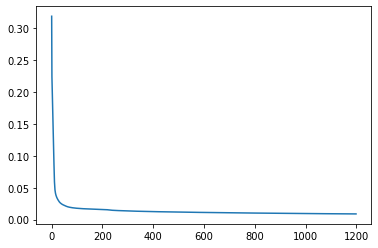

In [ ]:
plt.plot(errors)

In [ ]:
#Test
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test,0.001, params, training=False)

In [ ]:
y = np.where(y >= 0.55, 1, 0)

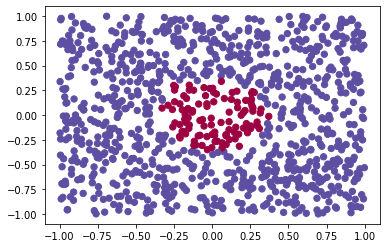

In [ ]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)